/tmp/ipython-input-4091344984.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None)


Original Shape: (1000, 25)
Sampled Shape: (500, 25)

Target Distribution:
 target
1    353
2    147
Name: count, dtype: int64


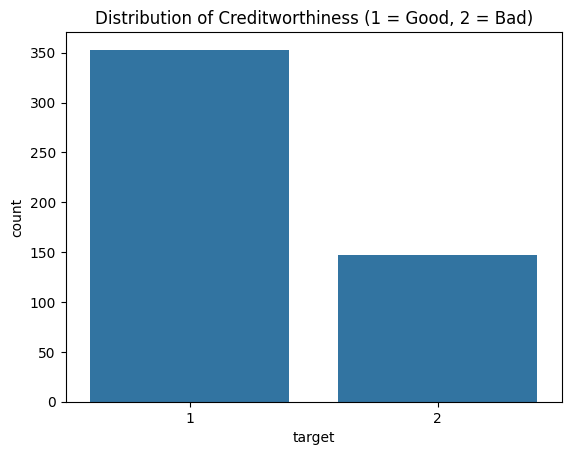


Summary Stats:
        feature_1   feature_2   feature_3   feature_4   feature_5   feature_6  \
count  500.00000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     2.57000   20.354000    2.560000   30.930000    2.106000    3.390000   
std      1.26503   12.048029    1.043349   25.393834    1.579796    1.223476   
min      1.00000    4.000000    0.000000    3.000000    1.000000    1.000000   
25%      1.00000   12.000000    2.000000   14.000000    1.000000    3.000000   
50%      2.00000   18.000000    2.000000   23.000000    1.000000    3.000000   
75%      4.00000   24.000000    4.000000   38.000000    3.000000    5.000000   
max      4.00000   72.000000    4.000000  149.000000    5.000000    5.000000   

        feature_7   feature_8   feature_9  feature_10  ...  feature_16  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     2.696000    2.850000    2.310000   35.614000  ...    0.222000   
std      0.727077    1.123398    1.04885

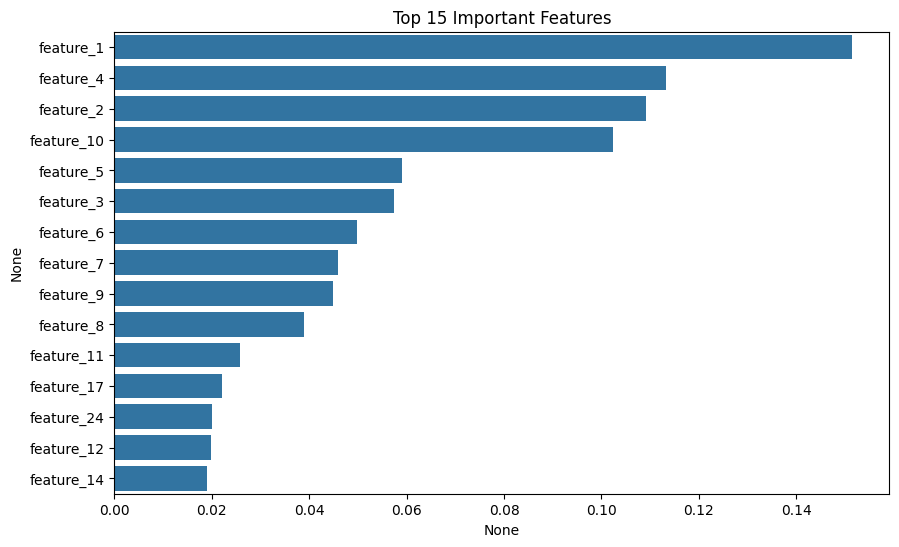

In [7]:
# =============================
# 1. Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# =============================
# 2. Load Dataset (German Credit - Numeric)
# =============================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
df = pd.read_csv(url, delim_whitespace=True, header=None)

# Add column names (24 features + 1 target)
columns = [f"feature_{i}" for i in range(1,25)] + ["target"]
df.columns = columns

print("Original Shape:", df.shape)

# Take only 500 rows for lightweight testing
df = df.sample(500, random_state=42).reset_index(drop=True)
print("Sampled Shape:", df.shape)

# =============================
# 3. Explore Dataset
# =============================
print("\nTarget Distribution:\n", df["target"].value_counts())

# Visualize target distribution
sns.countplot(x="target", data=df)
plt.title("Distribution of Creditworthiness (1 = Good, 2 = Bad)")
plt.show()

# Quick stats
print("\nSummary Stats:\n", df.describe())

# =============================
# 4. Preprocessing
# =============================
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =============================
# 5. Train Random Forest
# =============================
rf = RandomForestClassifier(
    n_estimators=100,   # lightweight
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

# =============================
# 6. Evaluation
# =============================
y_pred = rf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC for binary classification
y_pred_proba = rf.predict_proba(X_test)[:, 1]   # take prob for class "2"
roc_auc = roc_auc_score(y_test, y_pred_proba, average="macro")
print("\nROC-AUC Score:", roc_auc)

# =============================
# 7. Feature Importance
# =============================
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Important Features")
plt.show()
